In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    recall_score, 
    precision_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve,
    classification_report
)

# 1. Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names


In [14]:
# 2. Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)


In [15]:
# 3. Data preprocessing (Standard Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
# 4. Train the logistic regression model
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=10000, random_state=42)

In [17]:
# 5. Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class


In [18]:
# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)


Accuracy: 0.9824561403508771
Recall: 0.9861111111111112
Precision: 0.9861111111111112
F1-Score: 0.9861111111111112
AUC-ROC: 0.9953703703703703


In [19]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



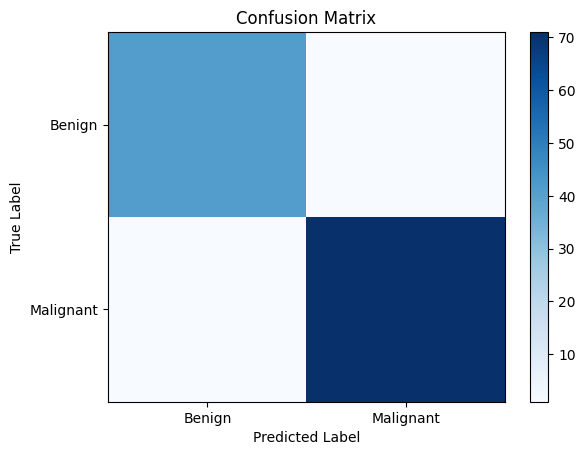

In [30]:
plt.figure()
plt.title("Confusion Matrix")
plt.imshow(cm, cmap='Blues', interpolation='nearest', aspect='auto')
plt.xticks([0, 1], ["Benign", "Malignant"]) # 0: Benign, 1: Malignant 
plt.yticks([0, 1], ["Benign", "Malignant"]) # 0: Benign, 1: Malignant

plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


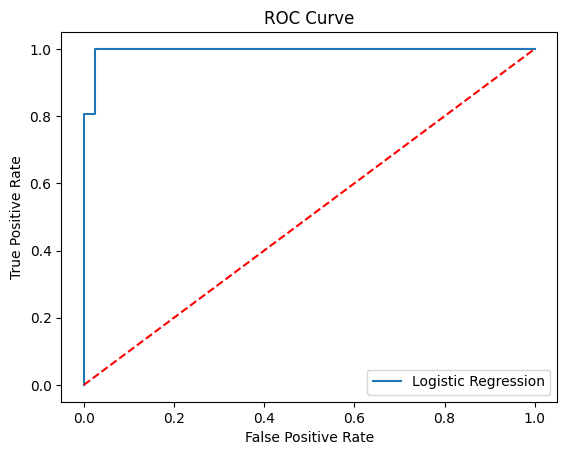

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.title("ROC Curve")
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [22]:
# Showing the scaled dataset with all columns (features)
train_df = pd.DataFrame(X_train_scaled, columns=feature_names)
test_df = pd.DataFrame(X_test_scaled, columns=feature_names)

print("\nFeature Names:")
print(feature_names)

print("\nScaled Training Data (first 5 rows):")
print(train_df.head())

print("\nScaled Test Data (first 5 rows):")
print(test_df.head())



Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Scaled Training Data (first 5 rows):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -1.072001     -0.658425       -1.088080  -0.939274        -0.135940   
1     1.748743      0.066502        1.751157   1.745559         1.274468   
2    -0.974734     -0.931124       -0.997709  -0.867589        -0.613515   
3    -0.145103     -1.215186       -0.123013  -0.253192         0.664482   
4    -0.771